In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib 
import seaborn as sns
matplotlib.rcParams["figure.figsize"] = (20,10)

In [3]:
df=pd.read_csv("bengaluru_house_prices.csv")

In [4]:
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [5]:
df.shape

(13320, 9)

In [6]:
df["area_type"].value_counts()

Super built-up  Area    8790
Built-up  Area          2418
Plot  Area              2025
Carpet  Area              87
Name: area_type, dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


In [8]:
#assuming that are_type, availability, society and balcony are not contributing much to house price, 
#we are going to drop the respective columns

In [9]:
df1=df.drop(["area_type", "availability", "society", "balcony"], axis=1)

In [10]:
df1.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


In [11]:
df1.isnull().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [12]:
#As the dataset have 13320 rows and null values are significantly low in comparision to whole data. 
#So we are going to drop the null values

In [13]:
df2=df1.dropna()
df2.isnull().sum() #we are creating the new dataframe so that if required we can use the previois or original data set

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [14]:
df2.shape

(13246, 5)

### Feature Engineering

Adding new features as per requirement

In [15]:
df2["size"].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [16]:
df2["bhk"]=df2["size"].apply(lambda x: int(x.split(" ")[0]))

C:\Users\Gulshan\AppData\Local\Temp/ipykernel_18772/2433779651.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2["bhk"]=df2["size"].apply(lambda x: int(x.split(" ")[0]))


In [17]:
df2.head()

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2


In [18]:
df2.total_sqft.unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [19]:
df2.total_sqft.dtypes
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13246 entries, 0 to 13319
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   location    13246 non-null  object 
 1   size        13246 non-null  object 
 2   total_sqft  13246 non-null  object 
 3   bath        13246 non-null  float64
 4   price       13246 non-null  float64
 5   bhk         13246 non-null  int64  
dtypes: float64(2), int64(1), object(3)
memory usage: 724.4+ KB


In [20]:
def convert_sqft_to_num(x):
    nums=x.split("-")
    if len(nums)==2:
        return (float(nums[0])+float(nums[1]))/2
    try:
        return float(x)
    except:
        return None

In [21]:
convert_sqft_to_num('2100-2100') #testing the function

2100.0

In [22]:
df3 = df2.copy()
df3.total_sqft = df3.total_sqft.apply(convert_sqft_to_num)
df3 = df3[df3.total_sqft.notnull()]
df3.head(2)

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4


In [23]:
df4 = df3.copy()
df4['price_per_sqft'] = df4['price']*100000/df4['total_sqft']
df4.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000


In [24]:
df4["location"].nunique()

1298

In [25]:
df4["location"]=df4["location"].apply(lambda x: x.strip()) #strip will remove any extra space in the location name

In [26]:
location_stats=df4["location"].value_counts()
location_stats

Whitefield                   533
Sarjapur  Road               392
Electronic City              304
Kanakpura Road               264
Thanisandra                  235
                            ... 
Rajanna Layout                 1
Subramanyanagar                1
Lakshmipura Vidyaanyapura      1
Malur Hosur Road               1
Abshot Layout                  1
Name: location, Length: 1287, dtype: int64

In [27]:
location_stats[location_stats<10].value_counts()

1    471
2    170
3    131
4     75
5     56
7     38
6     37
8     35
9     20
Name: location, dtype: int64

In [28]:
len(location_stats[location_stats<10])

1033

In [29]:
location_stats_less_than_10 = location_stats[location_stats<10]
location_stats_less_than_10

2nd Phase JP Nagar           9
Chandra Layout               9
Mathikere                    9
Kaverappa Layout             9
Peenya                       9
                            ..
Rajanna Layout               1
Subramanyanagar              1
Lakshmipura Vidyaanyapura    1
Malur Hosur Road             1
Abshot Layout                1
Name: location, Length: 1033, dtype: int64

In [30]:
df['location'].nunique()

1305

In [31]:
df4.location = df4.location.apply(lambda x: 'other' if x in location_stats_less_than_10 else x)
len(df4.location.unique())

255

### Treating Outliner

In [32]:
df4.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000


In [33]:
#Assuming that 2bhk should not be less than 600 sq. ft. than 1 bhk should not be less than 300 sq.ft. 

In [34]:
df4[df4.total_sqft/df4.bhk<300].head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
9,other,6 Bedroom,1020.0,6.0,370.0,6,36274.509804
45,HSR Layout,8 Bedroom,600.0,9.0,200.0,8,33333.333333
58,Murugeshpalya,6 Bedroom,1407.0,4.0,150.0,6,10660.980810
68,Devarachikkanahalli,8 Bedroom,1350.0,7.0,85.0,8,6296.296296
70,other,3 Bedroom,500.0,3.0,100.0,3,20000.000000


In [35]:
df5 = df4[~(df4.total_sqft/df4.bhk<300)]
df5.shape

(12456, 7)

In [36]:
df5.describe()

,total_sqft,bath,price,bhk,price_per_sqft
count,12456.000000,12456.000000,12456.000000,12456.000000,12456.000000
mean,1590.189927,2.562781,111.187960,2.649004,6308.502826
std,1260.404795,1.080275,152.203367,0.976046,4168.127339
min,300.000000,1.000000,9.000000,1.000000,267.829813
25%,1115.000000,2.000000,49.000000,2.000000,4210.526316
50%,1300.000000,2.000000,70.000000,3.000000,5294.117647
75%,1700.000000,3.000000,115.000000,3.000000,6916.666667
max,52272.000000,16.000000,3600.000000,16.000000,176470.588235


In [37]:
df6=df5.drop(["location","size"], axis=1)

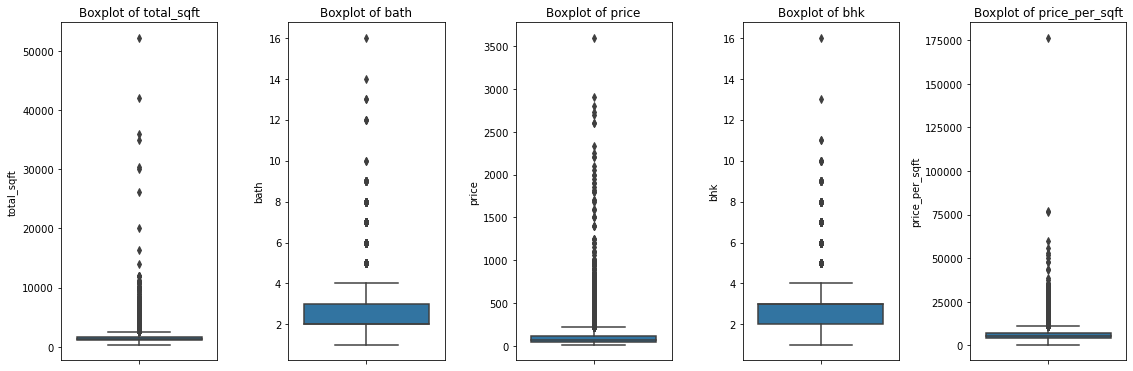

In [38]:
plt.figure(figsize = (19,15))
feature_list = df6.columns
for i in range(len(feature_list)):
    plt.subplot(3, 6, i + 1)
    sns.boxplot(y = df6[feature_list[i]], data = df6)
    plt.title(f'Boxplot of {feature_list[i]}')
    plt.tight_layout()

In [39]:
def remove_outliers(col):
    sorted(col)
    Q1,Q3=col.quantile([0.25,0.75])
    IQR=Q3-Q1
    lower_range=Q1-(IQR*1.5)
    upper_range=Q3+(IQR*1.5)
    return lower_range, upper_range

In [40]:
for i in feature_list:
    LL, UL = remove_outliers(df6[i])
    df6[i] = np.where(df6[i] > UL, UL, df6[i])
    df6[i] = np.where(df6[i] < LL, LL, df6[i])

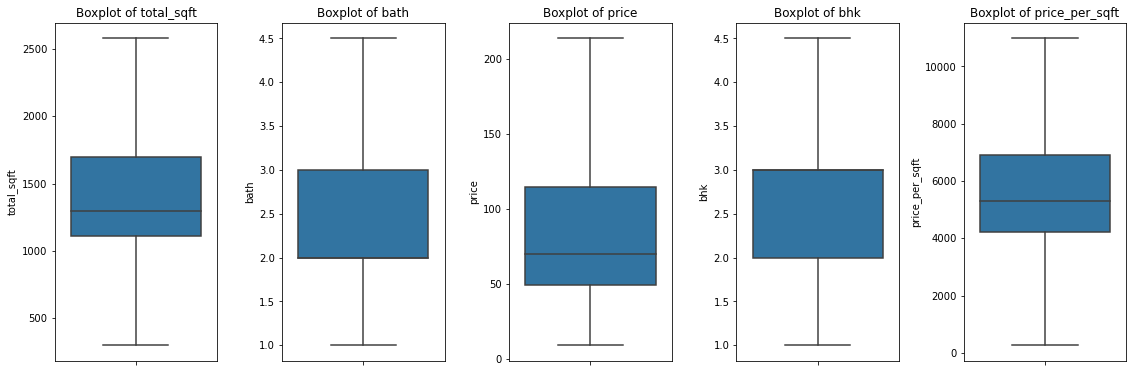

In [41]:
plt.figure(figsize = (19,15))
feature_list = df6.columns
for i in range(len(feature_list)):
    plt.subplot(3, 6, i + 1)
    sns.boxplot(y = df6[feature_list[i]], data = df6)
    plt.title(f'Boxplot of {feature_list[i]}')
    plt.tight_layout()

In [42]:
df6.shape

(12456, 5)

In [43]:
df6["location"]=df5["location"]

In [44]:
df6.head()

,total_sqft,bath,price,bhk,price_per_sqft,location
0,1056.0,2.0,39.07,2.0,3699.810606,Electronic City Phase II
1,2577.5,4.5,120.00,4.0,4615.384615,Chikka Tirupathi
2,1440.0,2.0,62.00,3.0,4305.555556,Uttarahalli
3,1521.0,3.0,95.00,3.0,6245.890861,Lingadheeranahalli
4,1200.0,2.0,51.00,2.0,4250.000000,Kothanur


In [45]:
# We are using IQR for treating the outliers as it will not drop the values and
# it can be used on the dataset irrespective of the distribution of the data.

<AxesSubplot:xlabel='total_sqft', ylabel='price'>

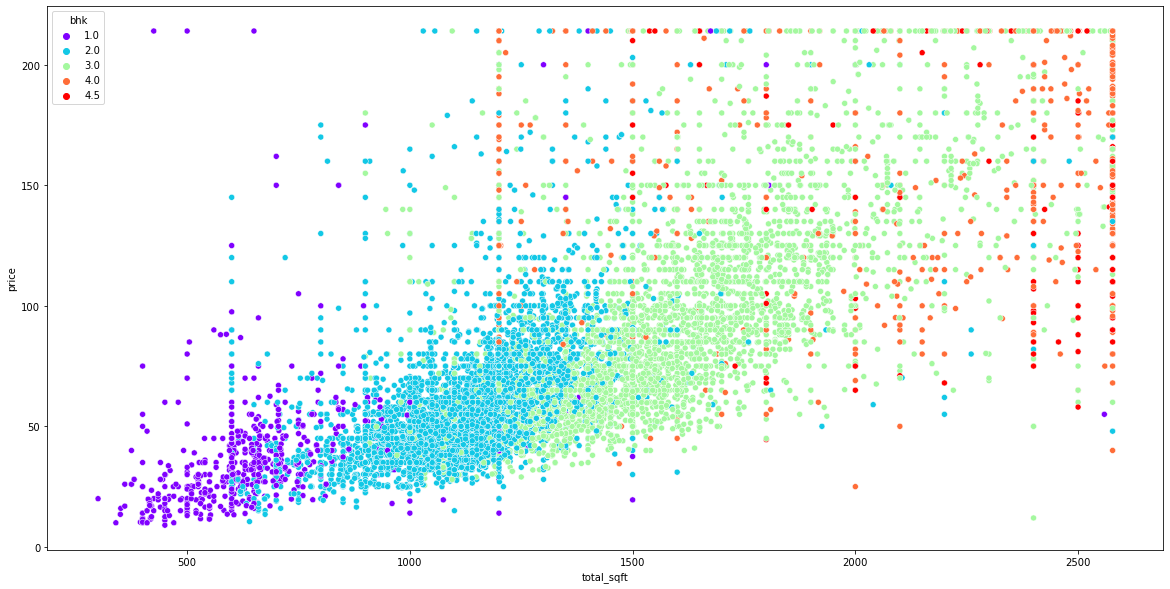

In [46]:
sns.scatterplot(x="total_sqft", y="price", data=df6, hue="bhk", palette="rainbow" )

In [47]:
#need to discuss with ayush

In [48]:
df6[df6["bath"]>df6["bhk"]]

,total_sqft,bath,price,bhk,price_per_sqft,location
1,2577.5,4.5,120.0,4.0,4615.384615,Chikka Tirupathi
11,2577.5,4.5,214.0,4.0,10592.459605,Whitefield
18,2577.5,4.0,214.0,3.0,10469.314079,other
22,2577.5,4.5,214.0,4.0,10975.877193,Thanisandra
62,2577.5,4.5,214.0,4.0,10975.877193,Whitefield
...,...,...,...,...,...,...
13268,2577.5,4.5,214.0,4.0,6577.380952,EPIP Zone
13293,2425.0,4.5,195.0,4.0,8041.237113,Sarjapur Road
13299,2577.5,4.5,154.5,4.0,5409.663866,Whitefield
13306,1200.0,4.5,214.0,4.0,10975.877193,other


<AxesSubplot:xlabel='bhk', ylabel='bath'>

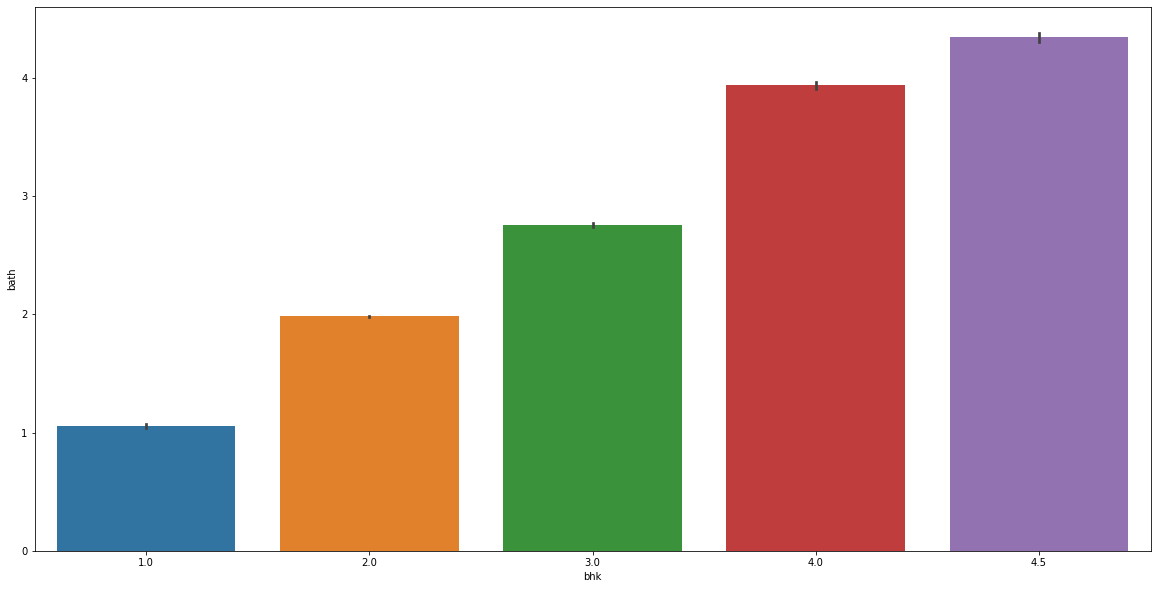

In [49]:
sns.barplot(x="bhk", y="bath", data= df6)

In [50]:
df7=df6.drop(["price_per_sqft"], axis=1)

In [51]:
df7.head()

,total_sqft,bath,price,bhk,location
0,1056.0,2.0,39.07,2.0,Electronic City Phase II
1,2577.5,4.5,120.00,4.0,Chikka Tirupathi
2,1440.0,2.0,62.00,3.0,Uttarahalli
3,1521.0,3.0,95.00,3.0,Lingadheeranahalli
4,1200.0,2.0,51.00,2.0,Kothanur


In [52]:
dummies=pd.get_dummies(df7["location"]) #one hot encoding for categorical column to give it numerical values 
dummies

,1st Block Jayanagar,1st Block Koramangala,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13315,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
13316,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
13317,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13318,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [53]:
df8 = pd.concat([df7,dummies.drop('other',axis='columns')],axis='columns')
df8.head() #we are dropping one column to avoid the dummy variable trap as the column can be presented by other columns value as zero.

,total_sqft,bath,price,bhk,location,1st Block Jayanagar,1st Block Koramangala,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,1056.0,2.0,39.07,2.0,Electronic City Phase II,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2577.5,4.5,120.00,4.0,Chikka Tirupathi,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1440.0,2.0,62.00,3.0,Uttarahalli,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1521.0,3.0,95.00,3.0,Lingadheeranahalli,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1200.0,2.0,51.00,2.0,Kothanur,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [54]:
df9= df8.drop(["location"], axis=1)
df9

,total_sqft,bath,price,bhk,1st Block Jayanagar,1st Block Koramangala,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,1056.0,2.0,39.07,2.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2577.5,4.5,120.00,4.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1440.0,2.0,62.00,3.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1521.0,3.0,95.00,3.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1200.0,2.0,51.00,2.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13315,2577.5,4.0,214.00,4.5,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
13316,2577.5,4.5,214.00,4.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13317,1141.0,2.0,60.00,2.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13318,2577.5,4.0,214.00,4.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Model Building

In [55]:
X = df9.drop(['price'],axis='columns')
X.head()

,total_sqft,bath,bhk,1st Block Jayanagar,1st Block Koramangala,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,1056.0,2.0,2.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2577.5,4.5,4.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1440.0,2.0,3.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1521.0,3.0,3.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1200.0,2.0,2.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [56]:
y = df9.price
y.head()

0     39.07
1    120.00
2     62.00
3     95.00
4     51.00
Name: price, dtype: float64

In [57]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=10)

In [58]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train,y_train)
print(lr.score(X_test,y_test))
print(lr.score(X_train,y_train))

0.7607924781737274
0.7504889765244354


### Use K Fold cross validation to measure accuracy of our LinearRegression model

In [59]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=5, test_size=0.3, random_state=10)

cross_val_score(LinearRegression(), X, y, cv=cv)

array([0.76079248, 0.74932147, 0.73733323, 0.74549924, 0.73892285])

In [60]:
predictions = lr.predict(X_test)

Text(0, 0.5, 'Predicted Y')

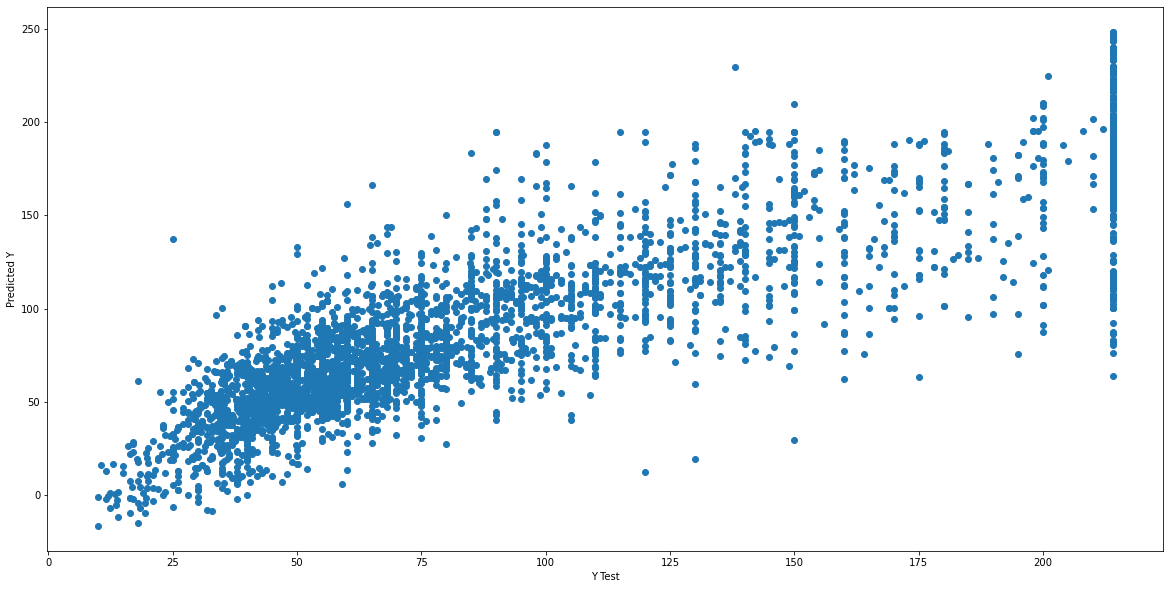

In [61]:
plt.scatter(y_test,predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

In [62]:
from sklearn import metrics
print('MAE',metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE 20.37335502749883
MSE: 784.9898908023611
RMSE: 28.017671045294986


### Testing the other models

In [63]:
import pandas as pd
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor

def find_best_model_using_gridsearchcv(X, y):
    algos = {
        'Linear Regression': (LinearRegression(), {}),
        'Lasso': (Lasso(), {'alpha': [1, 2], 'selection': ['random', 'cyclic']}),
        'Decision Tree': (DecisionTreeRegressor(), {'criterion': ['mse', 'friedman_mse'], 'splitter': ['best', 'random']})
    }
    scores = []

    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

    for algo_name, (model, params) in algos.items():
        gs = GridSearchCV(model, params, cv=cv, return_train_score=False)
        gs.fit(X, y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores)

# Assuming you have defined X and y
results = find_best_model_using_gridsearchcv(X, y)
print(results)


C:\Users\Gulshan\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
10 fits failed out of a total of 20.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Gulshan\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Gulshan\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 1247, in fit
    super().fit(
  File "C:\Users\Gulshan\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 177, in fit
    self._validate_params()
  File "C:\Users\Gulshan\anaconda3\lib\site-packages\sklearn\base.

               model  best_score  \
0  Linear Regression    0.740821   
1              Lasso    0.679551   
2      Decision Tree    0.673371   

                                         best_params  
0                                                 {}  
1                {'alpha': 1, 'selection': 'random'}  
2  {'criterion': 'friedman_mse', 'splitter': 'ran...  


### Testing the model

In [64]:
def predict_price(location,sqft,bath,bhk):    
    loc_index = np.where(X.columns==location)[0][0]

    x = np.zeros(len(X.columns))
    x[0] = sqft
    x[1] = bath
    x[2] = bhk
    if loc_index >= 0:
        x[loc_index] = 1

    return lr.predict([x])[0]

In [65]:
predict_price('1st Phase JP Nagar',1000, 2, 2)

C:\Users\Gulshan\anaconda3\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


87.00796651775234

In [66]:
predict_price('1st Phase JP Nagar',1000, 3, 3)

C:\Users\Gulshan\anaconda3\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


99.98280858561826

In [67]:
import pickle
with open('Real State Price Prediction','wb') as f:
    pickle.dump(lr,f)

In [68]:
import json
columns = {
    'data_columns' : [col.lower() for col in X.columns]
}
with open("columns.json","w") as f:
    f.write(json.dumps(columns))